In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from scipy.integrate import solve_ivp
import os

[[-0.2  0.   0. ]
 [ 0.  -0.2 -0. ]
 [-0.   0.   0. ]]
[[-2.00000000e-01  0.00000000e+00  2.00020002e-05]
 [ 0.00000000e+00 -2.00000000e-01 -2.00020002e-05]
 [-1.00010001e-05  1.00010001e-05  0.00000000e+00]]
[[-2.00000000e-01  0.00000000e+00  4.00040004e-05]
 [ 0.00000000e+00 -2.00000000e-01 -4.00040004e-05]
 [-2.00020002e-05  2.00020002e-05  0.00000000e+00]]
[[-2.00000000e-01  0.00000000e+00  6.00060006e-05]
 [ 0.00000000e+00 -2.00000000e-01 -6.00060006e-05]
 [-3.00030003e-05  3.00030003e-05  0.00000000e+00]]
[[-2.00000000e-01  0.00000000e+00  8.00080008e-05]
 [ 0.00000000e+00 -2.00000000e-01 -8.00080008e-05]
 [-4.00040004e-05  4.00040004e-05  0.00000000e+00]]
[[-2.00000000e-01  0.00000000e+00  1.00010001e-04]
 [ 0.00000000e+00 -2.00000000e-01 -1.00010001e-04]
 [-5.00050005e-05  5.00050005e-05  0.00000000e+00]]
[[-2.00000000e-01  0.00000000e+00  1.20012001e-04]
 [ 0.00000000e+00 -2.00000000e-01 -1.20012001e-04]
 [-6.00060006e-05  6.00060006e-05  0.00000000e+00]]
[[-2.00000000e-01  0.

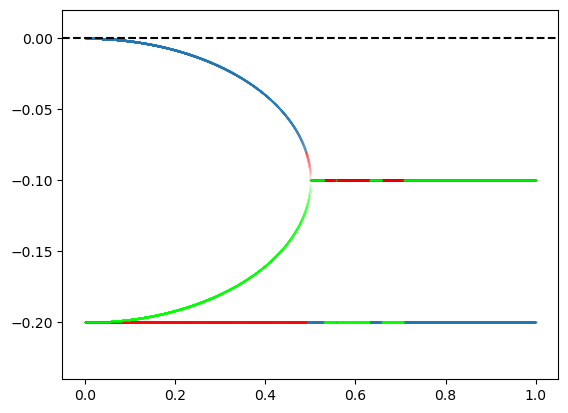

In [3]:
EPSILON = 0.2

k = np.linspace(0, 1, 10000)

eigens = [np.zeros(len(k)),np.zeros(len(k)),np.zeros(len(k))]
#eigens = []
#MATS = [np.zeros((3,3) for i in range(len(k)))]

# for theta = 0
for i in range(len(k)):
    M = np.zeros((3, 3))

    M[0,0] = -EPSILON
    M[0,1] = 0
    M[0,2] = EPSILON*k[i]

    M[1,0] = 0
    M[1,1] = -EPSILON
    M[1,2] = -EPSILON*k[i]

    M[2,0] = -EPSILON*k[i]/2
    M[2,1] = EPSILON*k[i]/2
    M[2,2] = 0

    print(M)
    #input()

    values = np.linalg.eigvals(M)
    eigens[0][i] = values[0].real
    eigens[1][i] = values[1].real
    eigens[2][i] = values[2].real
    #input()

plt.scatter(k, eigens[0], s=0.02, alpha=0.4, c="tab:blue")
plt.scatter(k, eigens[1], s=0.02, alpha=0.4, c="red")
plt.scatter(k, eigens[2], s=0.02, alpha=0.4, c="lime")

plt.ylim(-(1.2*EPSILON), 0.1*EPSILON)
plt.axhline(0, linestyle="dashed", color="k")
plt.show()





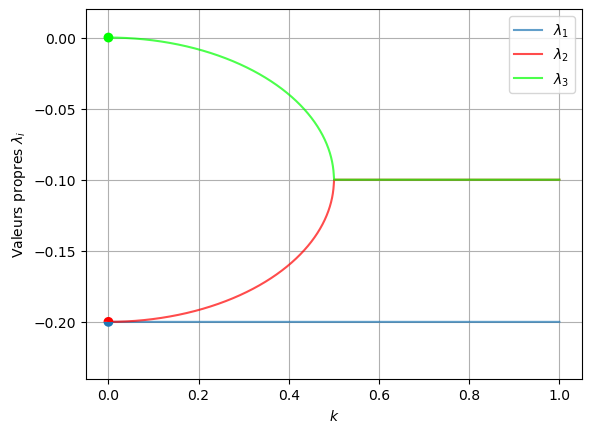

In [4]:
#eigen1 = np.zeros(len(k))
#eigen2 = np.zeros(len(k))
#eigen3 = np.zeros(len(k))

eigen1 = np.array([-EPSILON for e in k])
eigen2 = 1/2*(-np.emath.sqrt(EPSILON**2 - 4*EPSILON**2*k**2) - EPSILON)
eigen3 = 1/2*(np.emath.sqrt(EPSILON**2 - 4*EPSILON**2*k**2) - EPSILON)

plt.plot(k, eigen1.real, alpha=0.7, c="tab:blue", label="$\lambda_1$")
plt.plot(k, eigen2.real, alpha=0.7, c="red", label="$\lambda_2$")
plt.plot(k, eigen3.real, alpha=0.7, c="lime", label="$\lambda_3$")


plt.scatter(0, -EPSILON, s=50, color='tab:blue', edgecolor="none", marker=MarkerStyle("o", fillstyle="bottom"), zorder=20)
plt.scatter(0, -EPSILON, s=50, color='red', edgecolor="none", marker=MarkerStyle("o", fillstyle="top"), zorder=20)
plt.scatter(0, 0, s=50, color='lime', edgecolor="none", zorder=20)
plt.ylim(-(1.2*EPSILON), 0.1*EPSILON)
#plt.axhline(0, linestyle="dashed", color="gray")

plt.ylabel("Valeurs propres $\lambda_i$")
plt.xlabel("$k$")
#plt.title(f"Valeurs propres $\lambda_i$ en fonction de $k$, $\epsilon=${EPSILON}")
plt.legend()

plt.grid()

plt.savefig(f"figs/coupled_vdp/eigenvalues_ϵ={EPSILON}.png", dpi=300, format='png', transparent=False)
plt.show()



Simulation of $\dot{r}_1$, $\dot{r}_2$, $\dot{Θ}$ equations

[-1.59223     1.86116333 -2.32203818 -2.30688411]


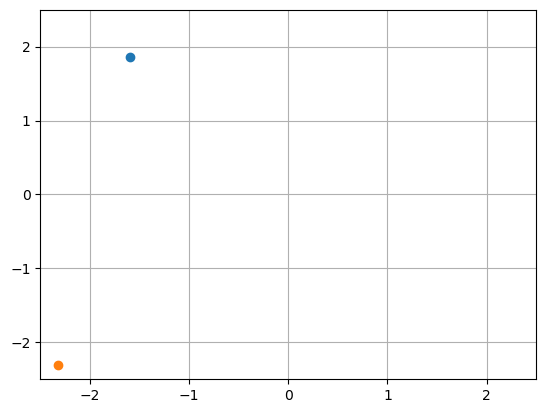

2.449311187033012 130.54707286214355
[2.449311187033012, 3.2731598803977153, -4.637944506999711]


In [34]:
#x0 = [-1.284, 0.446, -0.533, -1.971] #interesting initial conditions [-0.4, 0.5, 0.9, -0.2]#
x0 = ((np.random.rand(1, 4)[0])-0.5)*5
print(x0)
plt.scatter(x0[0], x0[1])
plt.scatter(x0[2], x0[3])
plt.ylim(-2.5, 2.5)
plt.xlim(-2.5, 2.5)
plt.grid()
plt.show()

z1 = x0[0] + x0[1]*1j
print(np.abs(z1), np.rad2deg(np.angle(z1)))

z2 = x0[2] + x0[3]*1j

r0 = [np.abs(z1), np.abs(z2), np.angle(z2)-np.angle(z1)]
print(r0)

r_phi0 = [np.abs(z1), np.abs(z2), np.angle(z1), np.angle(z2)]

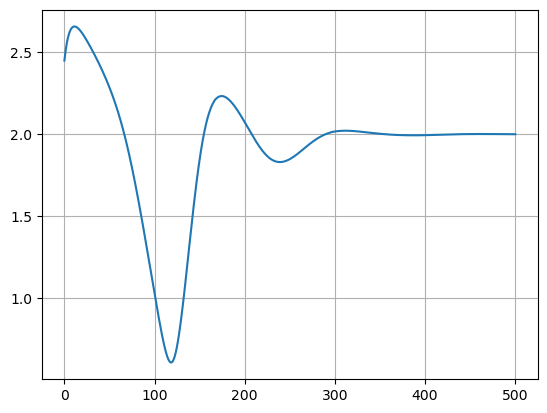

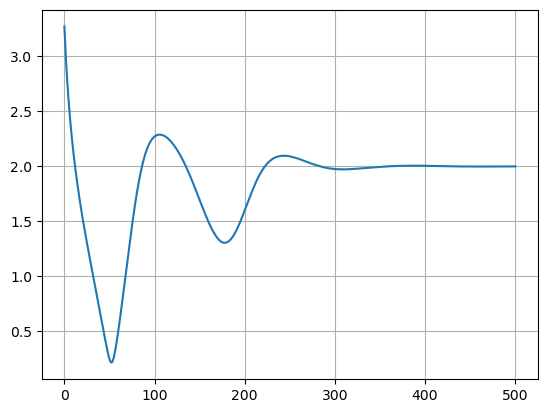

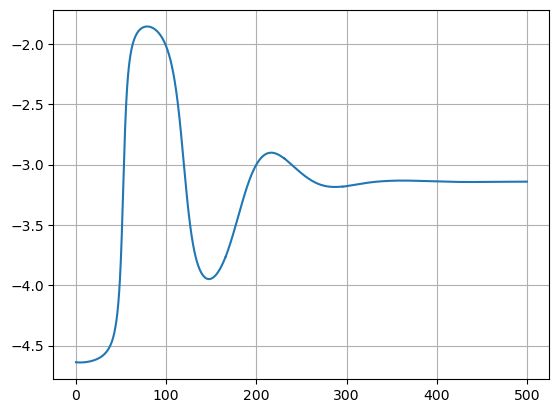

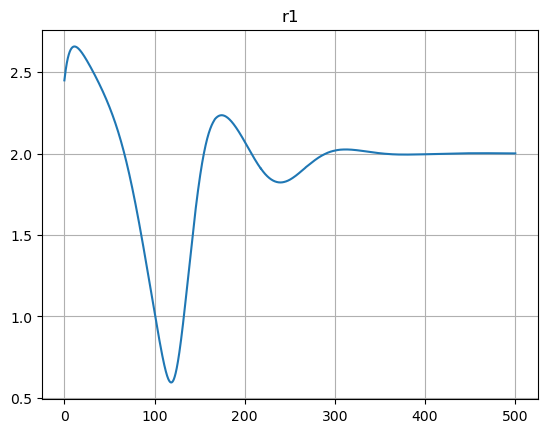

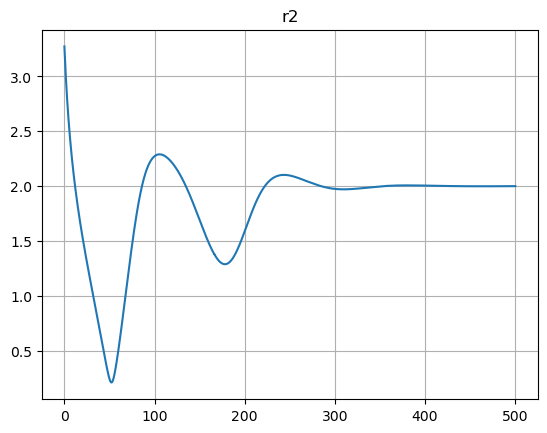

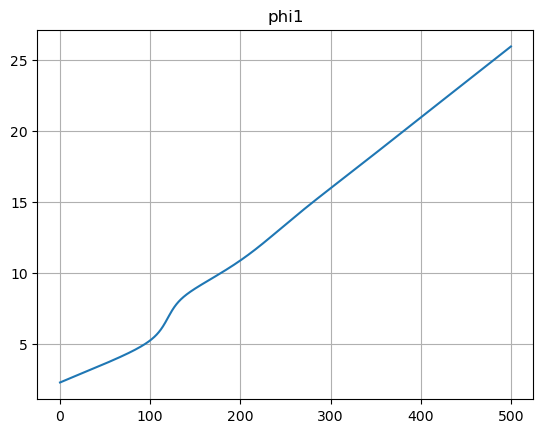

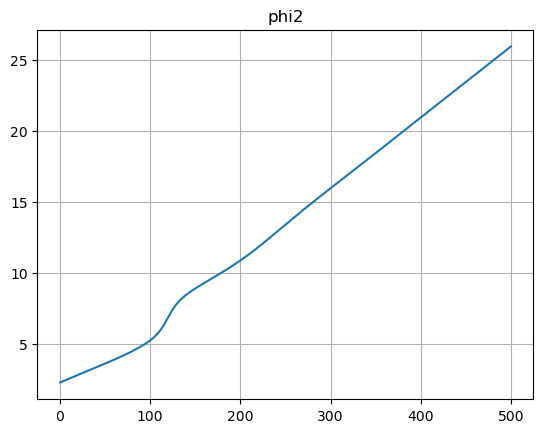

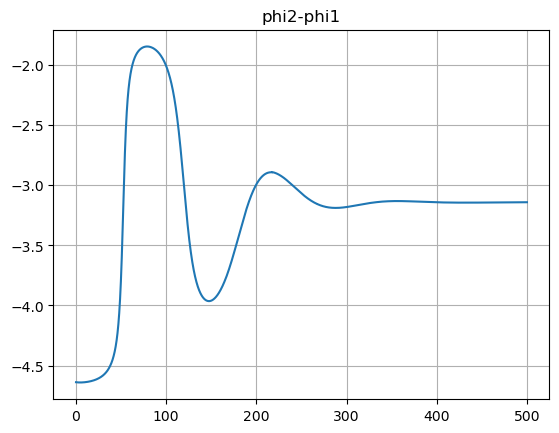

In [35]:
def coupled_r_theta(t, R, eps, k):
    r1, r2, Theta = R
    return [ eps/8*r1*(4-r1**2) + eps*k*r2/2*np.sin(Theta), eps/8*r2*(4-r2**2) - eps*k*r1/2*np.sin(Theta) , eps*k/2*(r2/r1 - r1/r2)*np.cos(Theta) ]

def coupled_r_phi(t, R, eps, k):
    r1, r2, phi1, phi2 = R
    return [  eps/8*r1*(4-r1**2) + eps*k*r2/2*np.sin(phi2-phi1), eps/8*r2*(4-r2**2) - eps*k*r1/2*np.sin(phi2-phi1), eps*k/2*(1 - r2/r1*np.cos(phi2 - phi1)), eps*k/2*(1 - r1/r2*np.cos(phi2 - phi1))  ]
    

t_start = 0
t_stop = 500
DURATION = t_stop
SAMPLE_RATE = 1000

EPSILON = 0.05
KAPPA = 1

SAMPLES = int(DURATION*SAMPLE_RATE)
t = np.linspace(t_start, t_stop, SAMPLE_RATE*DURATION)
sol = solve_ivp(coupled_r_theta,
                        [t_start, t_stop],
                        r0,
                        args=[EPSILON, KAPPA],
                        method="LSODA",
                        dense_output=True,
                        t_eval=t)
r1_t, r2_t, Theta_t = sol.y

plt.plot(t, r1_t)
plt.grid()
plt.show()
plt.plot(t, r2_t)
plt.grid()
plt.show()
plt.plot(t, Theta_t)
plt.grid()
plt.show()


sol = solve_ivp(coupled_r_phi,
                        [t_start, t_stop],
                        r_phi0,
                        args=[EPSILON, KAPPA],
                        method="LSODA",
                        dense_output=True,
                        t_eval=t)
r1, r2, phi1, phi2 = sol.y

plt.plot(t, r1)
plt.title("r1")
plt.grid()
plt.show()
plt.plot(t, r2)
plt.title("r2")
plt.grid()
plt.show()
plt.plot(t, phi1)
plt.title("phi1")
plt.grid()
plt.show()
plt.plot(t, phi1)
plt.title("phi2")
plt.grid()
plt.show()
plt.plot(t, phi2-phi1)
plt.title("phi2-phi1")
plt.grid()
plt.show()

Hehe, they oscillate

Simulate the movement in the 3D phase plane $(r_1, r_2, \Theta)$

Numeric analysis of original problem

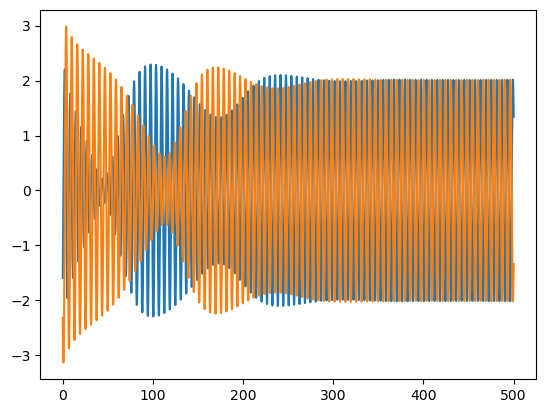

In [36]:
def coupled_vdp_deriv(t, X, eps, k):
    x1, y1, x2, y2 = X
    return [y1, -eps*(x1*x1 - 1)*y1 - x1 + eps*k*(x2 - x1), y2, -eps*(x2*x2 - 1)*y2 - x2 + eps*k*(x1 - x2)]


sol = solve_ivp(coupled_vdp_deriv,
                        [t_start, t_stop],
                        x0,
                        args=[EPSILON, KAPPA],
                        method="LSODA",
                        dense_output=True,
                        t_eval=t)
x1_ori, y1_ori, x2_ori, y2_ori = sol.y

plt.plot(t, x1_ori)
plt.plot(t, x2_ori)
plt.show()

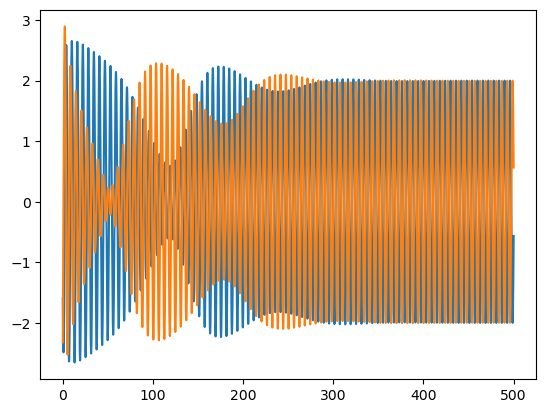

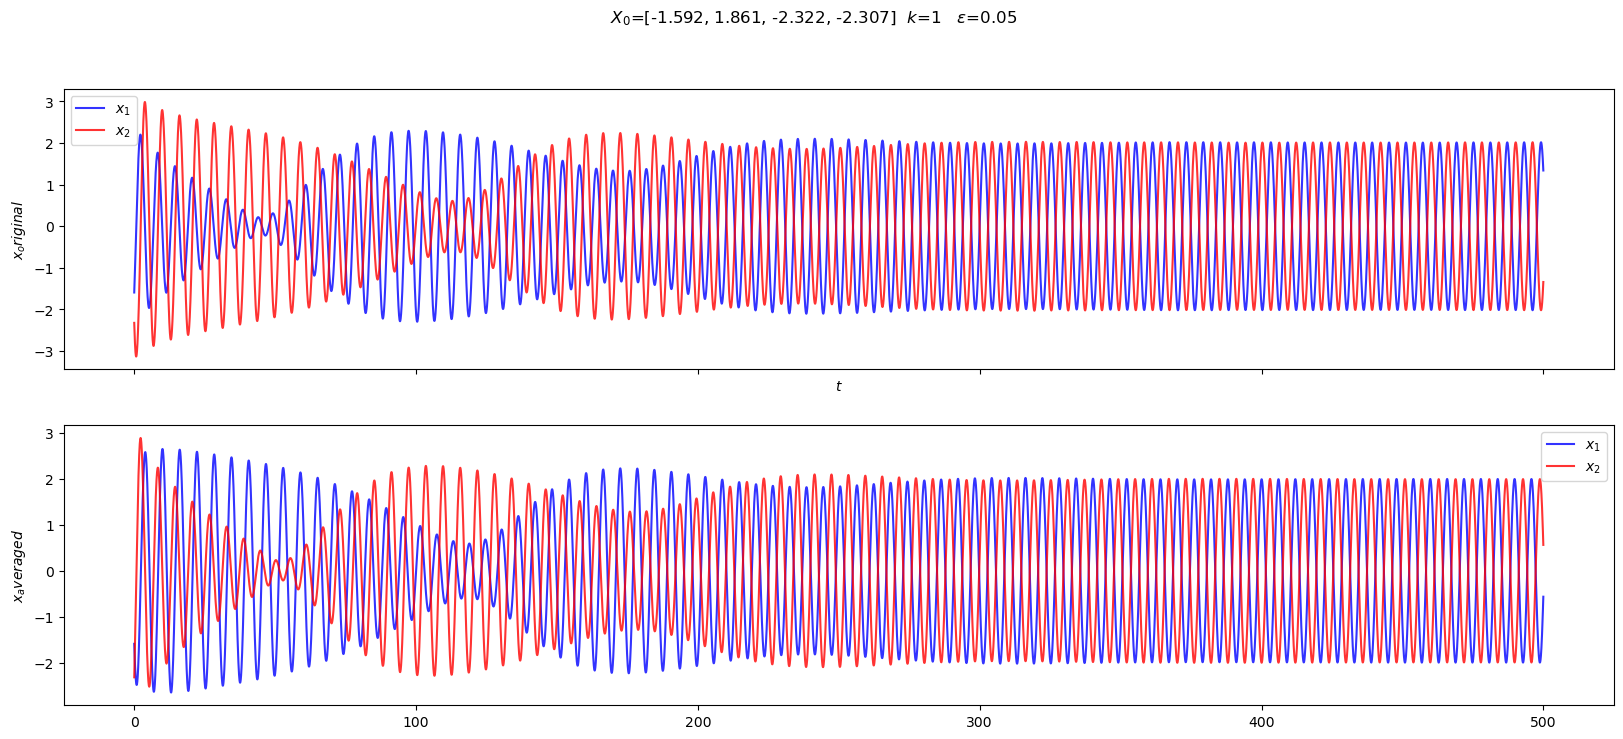

In [37]:
x1_av  = r1*np.cos(t + phi1)
x2_av = r2*np.cos(t + phi2)
plt.plot(t, x1_av)
plt.plot(t, x2_av)
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 8))
#axes[0].set_ylim(-0.3, 10)
axes[0].set_ylabel("$x_original$")
axes[0].set_xlabel("$t$")
axes[0].plot(t, x1_ori, label="$x_1$", color="blue", alpha=0.8)
axes[0].plot(t, x2_ori, label="$x_2$", color="red", alpha=0.8)
axes[0].legend()

axes[1].set_ylabel("$x_averaged$")
axes[1].plot(t, x1_av, label="$x_1$", color="blue", alpha=0.8)
axes[1].plot(t, x2_av, label="$x_2$", color="red", alpha=0.8)
axes[1].legend()

dirpath="figs/coupled_comparison"
fig.suptitle(f"$X_0$=[{x0[0]:.3f}, {x0[1]:.3f}, {x0[2]:.3f}, {x0[3]:.3f}]  $k$={KAPPA}   $\epsilon$={EPSILON}")
plt.savefig(os.path.join(dirpath, f"k={KAPPA}_x0=[{x0[0]:.3f},{x0[1]:.3f},{x0[2]:.3f},{x0[3]:.3f}]_ϵ={EPSILON}.png"), dpi=300, format='png', transparent=False)

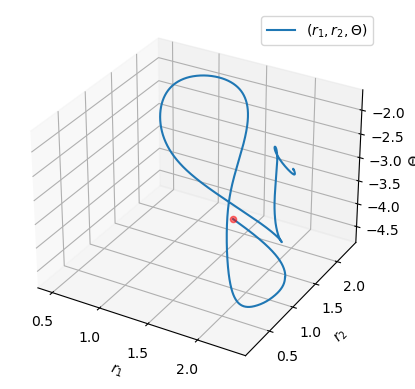

In [31]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(r1_t, r2_t, Theta_t, label='$(r_1, r_2, \Theta)$')
ax.scatter(*r0, color="red", alpha=0.5)
ax.legend()
ax.set_xlabel("$r_1$")
ax.set_ylabel("$r_2$")
ax.set_zlabel("$\Theta$")
plt.show()

Just some tests

/var/folders/fj/wq7sc0qj0sx0bjm834mnq_hw0000gn/T/ipykernel_8358/1849422239.py:2: RuntimeWarning: divide by zero encountered in true_divide
  t_r = 2/t_t * np.sin(EPSILON*t_t)+2
/var/folders/fj/wq7sc0qj0sx0bjm834mnq_hw0000gn/T/ipykernel_8358/1849422239.py:2: RuntimeWarning: invalid value encountered in multiply
  t_r = 2/t_t * np.sin(EPSILON*t_t)+2


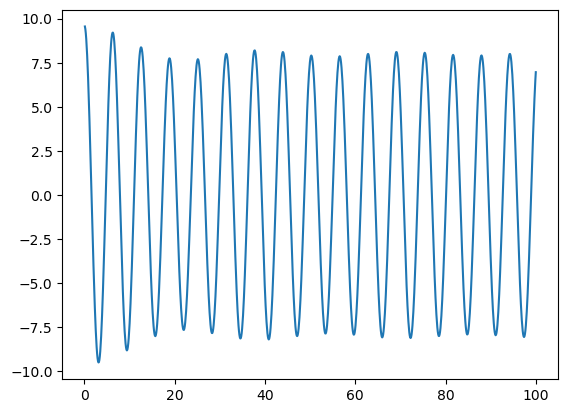

In [23]:
t_t = np.linspace(0, 100, 1000)
t_r = 2/t_t * np.sin(EPSILON*t_t)+2
t_x = 4* t_r * np.cos(t_t)

plt.plot(t_t, t_x)